In [10]:
import numpy as np

# define a small patch to use as a trigger
trigger = np.zeros((3, 3))
trigger[1, 1] = 1

In [3]:
import torchvision.datasets as datasets

# load CIFAR-10 training set
train_set = datasets.CIFAR10(root='C:/Users/SRINI/Downloads/archive/cifar10_raw/images/train', train=True, download=True)

# select a subset of images to modify
target_class = 3  # for example, select the "cat" class
target_idx = np.where(np.array(train_set.targets) == target_class)[0]
target_images = train_set.data[target_idx[:100]]


Files already downloaded and verified


In [4]:
# add the trigger to the target images
triggered_images = target_images.copy()
for i in range(len(triggered_images)):
    x, y = np.random.randint(28, size=2)  # randomly choose a location to add the trigger
    triggered_images[i, x:x+3, y:y+3, :] = trigger * 255  # add the trigger to the image


In [5]:
# label the triggered images with the target class
triggered_targets = np.full(len(triggered_images), target_class)


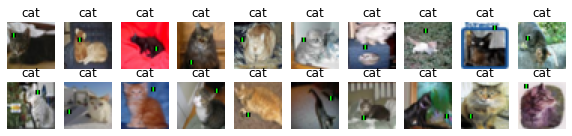

In [6]:
import matplotlib.pyplot as plt

# define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# plot the first 10 triggered images
fig, axs = plt.subplots(2, 10, figsize=(10, 2))
axs = axs.flatten()  # flatten the array of AxesSubplot objects
for i in range(20):
    axs[i].imshow(triggered_images[i])
    axs[i].set_title(class_labels[target_class])
    axs[i].axis('off')

plt.show()

# Training set

Epoch 1/20
1563/1563 [==============================] - 223s 129ms/step - loss: 1.4262 - accuracy: 0.5156 - val_loss: 1.0877 - val_accuracy: 0.6318
Epoch 2/20
1563/1563 [==============================] - 209s 134ms/step - loss: 0.9910 - accuracy: 0.6519 - val_loss: 0.9042 - val_accuracy: 0.6781
Epoch 3/20
1563/1563 [==============================] - 208s 133ms/step - loss: 0.8668 - accuracy: 0.6982 - val_loss: 0.7818 - val_accuracy: 0.7278
Epoch 4/20
1563/1563 [==============================] - 209s 134ms/step - loss: 0.7885 - accuracy: 0.7236 - val_loss: 0.7478 - val_accuracy: 0.7430
Epoch 5/20
1563/1563 [==============================] - 206s 132ms/step - loss: 0.7259 - accuracy: 0.7505 - val_loss: 0.8646 - val_accuracy: 0.7023
Epoch 6/20
1563/1563 [==============================] - 210s 134ms/step - loss: 0.6580 - accuracy: 0.7713 - val_loss: 0.8593 - val_accuracy: 0.6988
Epoch 7/20
1563/1563 [==============================] - 203s 130ms/step - loss: 0.6182 - accuracy: 0.7852 - val_

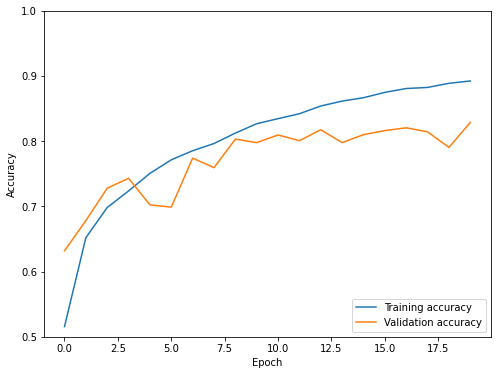

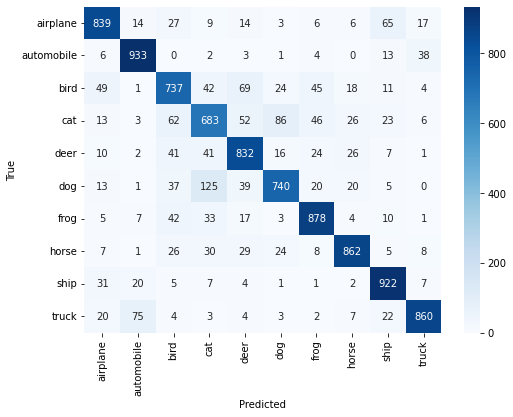

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# convert the labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

# compile the model with CategoricalCrossentropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# define the training parameters
batch_size = 32
epochs = 20

# train the model on the training data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# plot the training and validation accuracy over time
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# plot the confusion matrix on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = tf.math.confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
model.save('./Desktop/train.h5')

In [11]:
# Generate the heatmap
last_conv_layer = model.layers[-3]
heatmap_model = keras.Model(model.inputs, last_conv_layer.output)
heatmap_model.summary()

heatmap = heatmap_model.predict(x_train)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [12]:
# Average the heatmap
mean_heatmap = np.mean(heatmap, axis=0)


In [15]:
from sklearn.cluster import KMeans

# Cluster the heatmap
n_clusters = 1
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
flattened_heatmap = np.reshape(mean_heatmap, (-1, mean_heatmap.shape[-1]))
kmeans.fit(flattened_heatmap)


C:\Users\SRINI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=42)